In [83]:
#Učitavanje podataka u pandas DataFrame.
import pandas as pd

podaci = pd.read_csv('podaci_o_proizvodima.csv')
podaci

,Proizvod,Kolicina,Cijena_prije,Cijena_poslije,Porijeklo,Kategorija
0,krumpir mladi,1 kg,9.99,9.99,strano,povrce
1,krumpir stari,1 kg,4.99,4.49,strano,povrce
2,rajcica,1 kg,17.99,17.99,strano,povrce
3,luk,1 kg,5.99,6.99,strano,povrce
4,kelj,1 kg,7.99,9.99,strano,povrce
5,piletina b-zb,1 kg,29.99,26.99,domace,meso
6,mijesano meso Pik,1 kg,27.99,26.49,domace,meso
7,sol Pag,1 kg,4.99,4.69,domace,ostalo
8,ulje Zvijezda,1 L,10.99,10.99,domace,ostalo
9,ulje S-budget,1 L,7.99,7.99,strano,ostalo


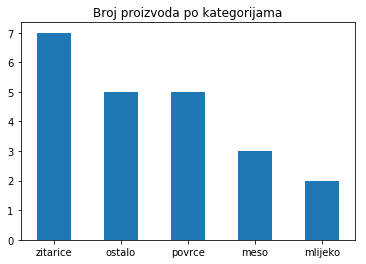

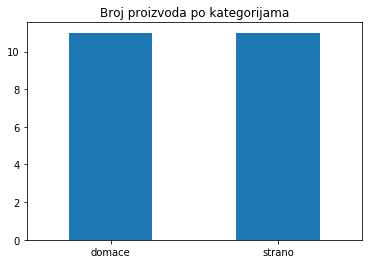

In [84]:
#Zastupljenost proizvoda po kategorijama i porijeklu:
import matplotlib.pyplot as plt
%matplotlib inline

podaci['Kategorija'].value_counts().plot.bar()
plt.xticks(rotation='horizontal')
plt.title('Broj proizvoda po kategorijama')
plt.show()

podaci['Porijeklo'].value_counts().plot.bar()
plt.xticks(rotation='horizontal')
plt.title('Broj proizvoda po kategorijama')
plt.show()

Iako se smanjena stopa poreza na hranu najavljivala samo za proizvode u kategorijama voća i povrća, cilj ovog istraživanja je vidjeti hoće li se i cijene hrane u ostalim kategorijama mijenjati, s obzirom da su cijene svakog proizvoda produkt više faktora, uključujući i cijene ostalih proizvoda.

Tako je za potrebe projekta odabrano po 7 proizvoda iz kategorije žitarica, po 5 proizvoda iz kategorija povrća i ostalo, 3 proizvoda iz kategorije mesa, te 2 proizvoda iz kategorije mlijeka. Prema porijeklu, broj proizvoda je jednak, po 11 za domaće i strane proizvode.

U kategoriju ostalo spadaju proizvodi poput začina i ulja.
U kategoriju žitarica spadaju proizvodi od žitarica, dobiveni direktno uzgajanjem ili preradom.

Odabrane namirnice predstavljaju one koje su najpopularnije za prehrambene potrebe prosječne obitelji.

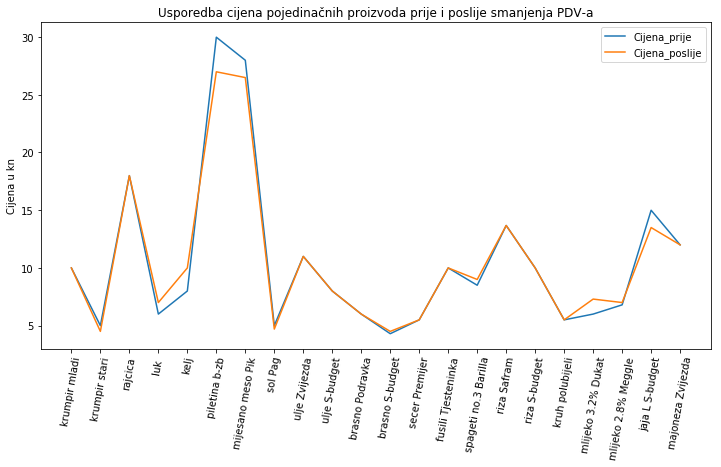

In [85]:
x = podaci['Proizvod']
y1 = podaci['Cijena_prije']
y2 = podaci['Cijena_poslije']
fig, ax = plt.subplots(figsize=(12,6))
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend()
plt.ylabel('Cijena u kn')
plt.xticks(rotation=80)
plt.title('Usporedba cijena pojedinačnih proizvoda prije i poslije smanjenja PDV-a')
plt.show()

Kao što se može vidjeti iz prethodnog grafa, nema značajnog smanjenja cijena među namirnicama, osim u kategoriji mesa (piletina i miješano meso). Štoviše, cijene su za većinu proizvoda ostale iste ili su čak malo porasle. Koliko točno iznose promjene cijena za namirnice, saznati ćemo u sljedećim koracima.

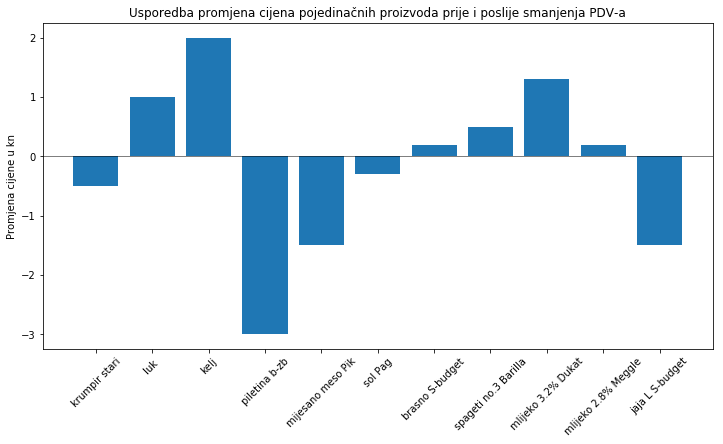

In [86]:
#Kreiranje novog stupca s promjenom u cijeni.
podaci['Promjena_cijene'] = y2 - y1

#Kreiranje nove tablice samo s proizvodima kojima se cijena promjenila.
rel_podaci = podaci[podaci['Promjena_cijene'] != 0.0]

#Prikaz promjena na grafu:
fig, ax = plt.subplots(figsize=(12,6))
plt.bar(rel_podaci['Proizvod'], rel_podaci['Promjena_cijene'])
plt.ylabel('Promjena cijene u kn')
plt.xticks(rotation=45)
plt.axhline(0, color='Black', linewidth=0.5)
plt.title('Usporedba promjena cijena pojedinačnih proizvoda prije i poslije smanjenja PDV-a')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


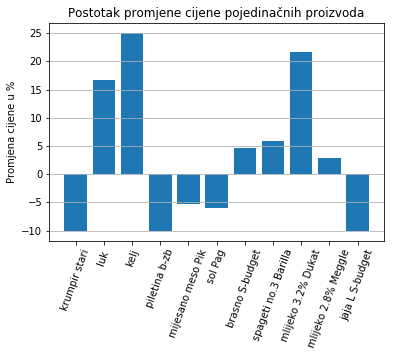

In [87]:
#Kreiranje novog stupca s postocima promjene cijena.
rel_podaci['Postotak_promjene'] = (rel_podaci['Cijena_poslije']/rel_podaci['Cijena_prije']) * 100 - 100
rel_podaci

plt.bar(rel_podaci['Proizvod'], rel_podaci['Postotak_promjene'])
plt.title('Postotak promjene cijene pojedinačnih proizvoda')
plt.ylabel('Promjena cijene u %')
plt.grid(axis='y')
plt.xticks(rotation=70)
plt.show()

Iz prethodnog grafa može se vidjeti da je do značajnog smanjenja cijena došlo jedino u kategoriji mesnih proizvoda (oko 10% sniženja), dok su ostali proizvodi uglavnom poskupjeli.

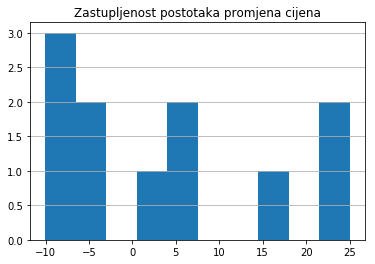

In [88]:
plt.hist(rel_podaci['Postotak_promjene'])
plt.title('Zastupljenost postotaka promjena cijena')
plt.grid(axis='y')
plt.show()

In [89]:
rel_podaci['Postotak_promjene'].describe()

count    11.000000
mean      3.229481
std      13.008147
min     -10.020040
25%      -8.007679
50%       2.945508
75%      11.291886
max      25.031289
Name: Postotak_promjene, dtype: float64

Iz ove statistike stupca 'Postotak_promjene' može se vidjeti da, gledajući sve proizvode kod kojih je došlo do promjene cijena, srednja vrijednost postotka promjene cijena iznosi  ~ 3.23%, a prosjek 2.94%, što znači da je u globalu došlo do rasta cijena.

In [91]:
#Kreiranje nove inačice podataka, za daljnju manipulaciju.
podaci['Postotak_promjene'] = (podaci['Cijena_poslije']/podaci['Cijena_prije']) * 100 - 100
podaci.to_csv('podaci_o_proizvodima_2.csv', sep=',', encoding='utf-8')
podaci

,Proizvod,Kolicina,Cijena_prije,Cijena_poslije,Porijeklo,Kategorija,Promjena_cijene,Postotak_promjene
0,krumpir mladi,1 kg,9.99,9.99,strano,povrce,0.0,0.000000
1,krumpir stari,1 kg,4.99,4.49,strano,povrce,-0.5,-10.020040
2,rajcica,1 kg,17.99,17.99,strano,povrce,0.0,0.000000
3,luk,1 kg,5.99,6.99,strano,povrce,1.0,16.694491
4,kelj,1 kg,7.99,9.99,strano,povrce,2.0,25.031289
5,piletina b-zb,1 kg,29.99,26.99,domace,meso,-3.0,-10.003334
6,mijesano meso Pik,1 kg,27.99,26.49,domace,meso,-1.5,-5.359057
7,sol Pag,1 kg,4.99,4.69,domace,ostalo,-0.3,-6.012024
8,ulje Zvijezda,1 L,10.99,10.99,domace,ostalo,0.0,0.000000
9,ulje S-budget,1 L,7.99,7.99,strano,ostalo,0.0,0.000000
